#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data'

total 4080
-rw------- 1 root root 4177835 May 20 13:32 data_2020.csv


#2. Korean Character

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,645 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [3]:
import pandas as pd

In [4]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data/data_2020.csv'
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157978 entries, 0 to 157977
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     157978 non-null  int64
 1   집계시      157978 non-null  int64
 2   출발영업소코드  157978 non-null  int64
 3   도착영업소코드  157978 non-null  int64
 4   통행시간     157978 non-null  int64
 5   요일       157978 non-null  int64
dtypes: int64(6)
memory usage: 7.2 MB


In [7]:
# distance from Seoul: 0, 20, 77, 135, 185, 240, 215, 339, 407
data["도착영업소코드"]= data["도착영업소코드"].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407}) 

In [8]:
data.rename(columns={"도착영업소코드":"거리"}, inplace=True)

In [9]:
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
157973,20201231,3,101,215,8806,3
157974,20201231,5,101,215,8733,3
157975,20201231,6,101,77,3173,3
157976,20201231,13,101,77,3866,3


#4. Linear Regression by Tensorflow

In [10]:
import tensorflow as tf
import numpy as np
%matplotlib inline

In [11]:
selected_date = '2020-01-10' #@param {type:"date"}
input_date = int(selected_date.replace('-',''))
print(input_date)

20200110


In [12]:
data_date = data[data["집계일자"]==input_date]

In [13]:
data_date

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
3704,20200110,9,101,20,778,4
3705,20200110,9,101,20,862,4
3706,20200110,9,101,20,739,4
3707,20200110,9,101,20,852,4
3708,20200110,9,101,20,874,4
...,...,...,...,...,...,...
8777,20200110,2,101,135,7556,4
8779,20200110,6,101,135,6902,4
8784,20200110,7,101,215,8207,4
8785,20200110,3,101,135,4560,4


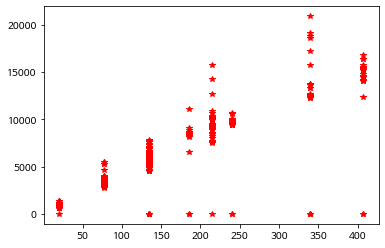

In [14]:
plt.plot(data_date['거리'], data_date['통행시간'], 'r*')

In [16]:
data_time = data_date.groupby(["집계일자","거리"])["통행시간"].mean()

In [17]:
data_time

집계일자      거리 
20200110  20       873.576642
          77      3545.876190
          135     5307.187500
          185     7742.714286
          215     9326.111111
          240     8642.647059
          339    12160.500000
          407    13919.333333
Name: 통행시간, dtype: float64

In [18]:
data_out = data_time.reset_index()

In [19]:
data_out

,집계일자,거리,통행시간
0,20200110,20,873.576642
1,20200110,77,3545.876190
2,20200110,135,5307.187500
3,20200110,185,7742.714286
4,20200110,215,9326.111111
5,20200110,240,8642.647059
6,20200110,339,12160.500000
7,20200110,407,13919.333333


In [20]:
# dataframe to list
data_list = data_out.values.tolist()
data_list

[[20200110.0, 20.0, 873.5766423357665],
 [20200110.0, 77.0, 3545.8761904761905],
 [20200110.0, 135.0, 5307.1875],
 [20200110.0, 185.0, 7742.714285714285],
 [20200110.0, 215.0, 9326.111111111111],
 [20200110.0, 240.0, 8642.64705882353],
 [20200110.0, 339.0, 12160.5],
 [20200110.0, 407.0, 13919.333333333334]]

In [21]:
x_train = [int(r[1]) for r in data_list]
y_train = [int(r[2]/10) for r in data_list]

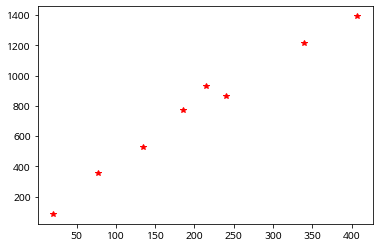

In [22]:
plt.plot(x_train, y_train, 'r*')

In [23]:
learning_rate = 1e-8
learning_epochs = 2000

In [24]:
# Stochastic Gradient Descent (SGD) Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

model.compile(loss=mse, optimizer=sgd)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
# train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 857708.2500
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 855821.9375
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 853939.7500
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 852061.6250
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 850187.7500
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 848318.0000
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 846452.5000
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 844591.0000
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 842733.6250
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 840880.4375
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 839031.3750
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 83

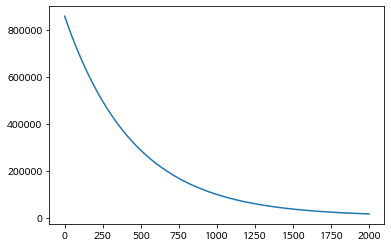

In [27]:
plt.plot(history.history["loss"])
plt.show()

In [28]:
data_out

,집계일자,거리,통행시간
0,20200110,20,873.576642
1,20200110,77,3545.876190
2,20200110,135,5307.187500
3,20200110,185,7742.714286
4,20200110,215,9326.111111
5,20200110,240,8642.647059
6,20200110,339,12160.500000
7,20200110,407,13919.333333


In [40]:
distance = 407 #@param {type:"slider", min:0, max:500, step:1}
input_data = [distance]
predicted_value = model.predict(input_data)
print(predicted_value)
print("%3d km takes %5.1f seconds on %s" %(distance, predicted_value[0][0]*10, selected_date))

[[1382.7448]]
407 km takes 13827.4 seconds on 2020-01-10
